In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 전처리

In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/deeplearning_bootcamp/노면결빙_ 분석 데이터.xlsx", engine="openpyxl", sheet_name="통합", skiprows=1)

In [ ]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['번호', 'Date', 'Time', 'Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed',
       'Dir', 'Run', 'Speed.1', 'Dir.1', 'Chill', 'Index', 'Index.1',
       'Index.2', 'Bar  ', 'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ',
       'Index.3', 'Dose', 'UV ', 'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew',
       'Heat', 'EMC', 'Density', 'ET ', 'Temp 1', 'Temp 2', 'Samp', 'Tx ',
       'Recept', 'Int.', '노면상태', '수막두께', '시편상태', '요약', '날씨', '알고리즘1', '요약.1',
       '알고리즘2', '요약.2', '적중률', '적중률.1', '적중률.2', '적중률.3', '①', '②', '③', '④',
       '⑤', '⑥', '최종', '요약.3', '적중률.4', '적중률.5', '①.1', '②.1', '③.1', '⑤.1',
       '①.2', '②.2', '③.2', '⑤.2', '⑥.1', '①+②', '①+③', '①+⑤', '①+⑥', '②+③',
       '②+⑤', '②+⑥', '③+⑤', '③+⑥', '⑤+⑥', '①+②+③', '①+②+⑤', '①+②+⑥', '①+③+⑤',
       '①+③+⑥', '①+⑤+⑥', '②+③+⑤', '②+③+⑥', '②+⑤+⑥', '③+⑤+⑥', '①+②+③+⑤',
       '①+②+③+⑥', '①+②+⑤+⑥', '①+③+⑤+⑥', '②+③+⑤+⑥', '①+②+③+⑤+⑥', '①.3', '②.3',
       '③.3', '⑤.3', '①+②.1', '①+③.1', '①+⑤.1', '②+③.1', '②+⑤.1', '③+⑤.1',
       '①+②+③.1', 

In [ ]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

번호               0
Date             0
Time             0
Out              0
Temp             0
Temp.1           0
Hum              0
Pt.              0
Speed            0
Dir              0
Run              0
Speed.1          0
Dir.1            0
Chill            0
Index            0
Index.1          0
Index.2          0
Bar              0
Rain             0
Rate             0
Rad.             0
Energy           0
Rad.             0
Index.3          0
Dose             0
UV               0
D-D              0
D-D .1           0
Temp.2           0
Hum.1            0
Dew              0
Heat             0
EMC              0
Density          0
ET               0
Temp 1           0
Temp 2       37326
Samp             0
Tx               0
Recept           0
Int.             0
노면상태         19456
수막두께             0
시편상태          8441
요약            8441
날씨           28852
알고리즘1         6497
요약.1          6497
알고리즘2         6497
요약.2          6497
적중률          10681
적중률.1        10681
적중률.2       

In [ ]:
df_xy = df.loc[:,['Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed',
       'Run', 'Speed.1', 'Chill', 'Index', 'Index.1',
       'Index.2', 'Bar  ', 'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ',
       'Index.3', 'Dose', 'UV ', 'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew',
       'Heat', 'EMC', 'Density', 'ET ', 'Temp 1', 'Samp', 'Tx ',
       'Recept', 'Int.', '수막두께', '요약']]

In [ ]:
df_xy.shape

(49690, 37)

In [ ]:
df_xy.isnull().sum()

Out           0
Temp          0
Temp.1        0
Hum           0
Pt.           0
Speed         0
Run           0
Speed.1       0
Chill         0
Index         0
Index.1       0
Index.2       0
Bar           0
Rain          0
Rate          0
Rad.          0
Energy        0
Rad.          0
Index.3       0
Dose          0
UV            0
D-D           0
D-D .1        0
Temp.2        0
Hum.1         0
Dew           0
Heat          0
EMC           0
Density       0
ET            0
Temp 1        0
Samp          0
Tx            0
Recept        0
Int.          0
수막두께          0
요약         8441
dtype: int64

In [ ]:
df_xy.dropna(inplace=True)
df_xy.isnull().sum()

Out        0
Temp       0
Temp.1     0
Hum        0
Pt.        0
Speed      0
Run        0
Speed.1    0
Chill      0
Index      0
Index.1    0
Index.2    0
Bar        0
Rain       0
Rate       0
Rad.       0
Energy     0
Rad.       0
Index.3    0
Dose       0
UV         0
D-D        0
D-D .1     0
Temp.2     0
Hum.1      0
Dew        0
Heat       0
EMC        0
Density    0
ET         0
Temp 1     0
Samp       0
Tx         0
Recept     0
Int.       0
수막두께       0
요약         0
dtype: int64

In [ ]:
df_xy.shape

(41249, 37)

In [ ]:
index = df_xy[df_xy['요약']=='확인불가'].index
df_xy.drop(index, inplace=True)

In [ ]:
import numpy as np
df_xy['요약'] = np.where(df_xy['요약'] == '결빙', 1, 0)

In [ ]:
print('전체 데이터 수: ', df_xy['요약'].count())
print('결빙 데이터 수: ', df_xy['요약'].sum())
print('비결빙 데이터 수: ', df_xy['요약'].count() - df_xy['요약'].sum())

전체 데이터 수:  39007
결빙 데이터 수:  23409
비결빙 데이터 수:  15598


In [ ]:
df_xy.reset_index(inplace=True)
df_xy.drop(['index'], axis=1, inplace=True)

In [ ]:
df_xy.shape

(39007, 37)

In [ ]:
features = df_xy[['Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed',
       'Run', 'Speed.1', 'Chill', 'Index', 'Index.1',
       'Index.2', 'Bar  ', 'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ',
       'Index.3', 'Dose', 'UV ', 'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew',
       'Heat', 'EMC', 'Density', 'ET ', 'Temp 1', 'Samp', 'Tx ',
       'Recept', 'Int.', '수막두께']]
frazil = df_xy['요약']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, frazil)

### 데이터 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
import joblib

# 분류 모델

### 로지스틱 회귀 모델

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', max_iter=300)
lr_model.fit(train_features, train_labels)

LogisticRegression(class_weight='balanced', max_iter=300)

In [ ]:
print(lr_model.score(train_features, train_labels))

0.9358742095368313


In [ ]:
print(lr_model.score(test_features, test_labels))

0.9315012305168171


### 랜덤 포레스트 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_depth=20)
rf_model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=20, min_samples_split=3)

In [ ]:
print(rf_model.score(train_features, train_labels))

1.0


In [ ]:
print(rf_model.score(test_features, test_labels))

0.9979491386382281


### xgboost 모델

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=10)
xgb_model.fit(train_features, train_labels)

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=500)

In [ ]:
print(xgb_model.score(train_features, train_labels))

0.9998974534267646


In [ ]:
print(xgb_model.score(test_features, test_labels))

0.9985643970467596


### 앙상블 모델(소프트 보팅)

##### 로지스틱 회귀 + 랜덤 포레스트 + XGBoost

In [ ]:
from sklearn.ensemble import VotingClassifier
lr1 = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', max_iter=300)
rf1 = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_depth=20)
xgb1 = xgb.XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=10)

voting_model1 = VotingClassifier([('lr',lr1),('rf',rf1),('xgb',xgb1)], voting='soft')

In [ ]:
voting_model1.fit(train_features, train_labels)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=300)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=3)),
                             ('xgb',
                              XGBClassifier(learning_rate=0.01, max_depth=10,
                                            n_estimators=500))],
                 voting='soft')

In [ ]:
print(voting_model1.score(train_features, train_labels))

0.9997949068535293


In [ ]:
print(voting_model1.score(test_features, test_labels))

0.9973338802296965


##### 랜덤 포레스트 + XGBoost

In [ ]:
joblib.dump(voting_model1,'/content/drive/MyDrive/deeplearning_bootcamp/models/voting_model_lr_rf_xgb.pkl')

['/content/drive/MyDrive/deeplearning_bootcamp/models/voting_model_lr_rf_xgb.pkl']

In [ ]:
from sklearn.ensemble import VotingClassifier
rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_depth=20)
xgb2 =  xgb.XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=10)

voting_model2 = VotingClassifier([('rf',rf2),('xgb',xgb2)], voting='soft')

In [ ]:
voting_model2.fit(train_features, train_labels)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=3)),
                             ('xgb',
                              XGBClassifier(learning_rate=0.01, max_depth=10,
                                            n_estimators=500))],
                 voting='soft')

In [ ]:
print(voting_model2.score(train_features, train_labels))

0.9999658178089216


In [ ]:
print(voting_model2.score(test_features, test_labels))

0.9986669401148482


In [ ]:
joblib.dump(voting_model2,'/content/drive/MyDrive/deeplearning_bootcamp/models/voting_model_rf_xgb.pkl')

['/content/drive/MyDrive/deeplearning_bootcamp/models/voting_model_rf_xgb.pkl']

### DNN 모델

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(36,)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.1)) 

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),  
    metrics=['accuracy'])

In [ ]:
his = model.fit(
    train_features, train_labels,
    #batch_size=3000, 
    epochs=200,
    validation_split=0.2
    )

Epoch 1/200
732/732 [==============================] - 7s 4ms/step - loss: 0.1571 - accuracy: 0.9328 - val_loss: 0.1183 - val_accuracy: 0.9484
Epoch 2/200
732/732 [==============================] - 3s 3ms/step - loss: 0.1116 - accuracy: 0.9530 - val_loss: 0.0808 - val_accuracy: 0.9694
Epoch 3/200
732/732 [==============================] - 3s 3ms/step - loss: 0.0859 - accuracy: 0.9658 - val_loss: 0.0595 - val_accuracy: 0.9783
Epoch 4/200
732/732 [==============================] - 2s 3ms/step - loss: 0.0730 - accuracy: 0.9721 - val_loss: 0.0572 - val_accuracy: 0.9786
Epoch 5/200
732/732 [==============================] - 3s 3ms/step - loss: 0.0616 - accuracy: 0.9771 - val_loss: 0.0469 - val_accuracy: 0.9812
Epoch 6/200
732/732 [==============================] - 3s 4ms/step - loss: 0.0540 - accuracy: 0.9786 - val_loss: 0.0474 - val_accuracy: 0.9802
Epoch 7/200
732/732 [==============================] - 3s 5ms/step - loss: 0.0489 - accuracy: 0.9815 - val_loss: 0.0322 - val_accuracy: 0.9896

In [ ]:
score = model.evaluate(test_features, test_labels)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

305/305 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9969
test_loss:  0.01046281773597002
test_acc:  0.9969236850738525


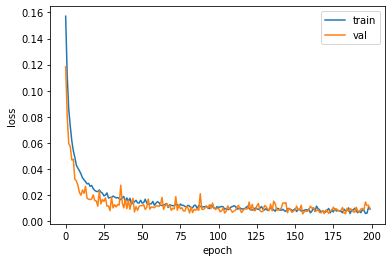

In [ ]:
import matplotlib.pyplot as plt

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [ ]:
model.save('DNN_model.h5')

# 데이터 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_

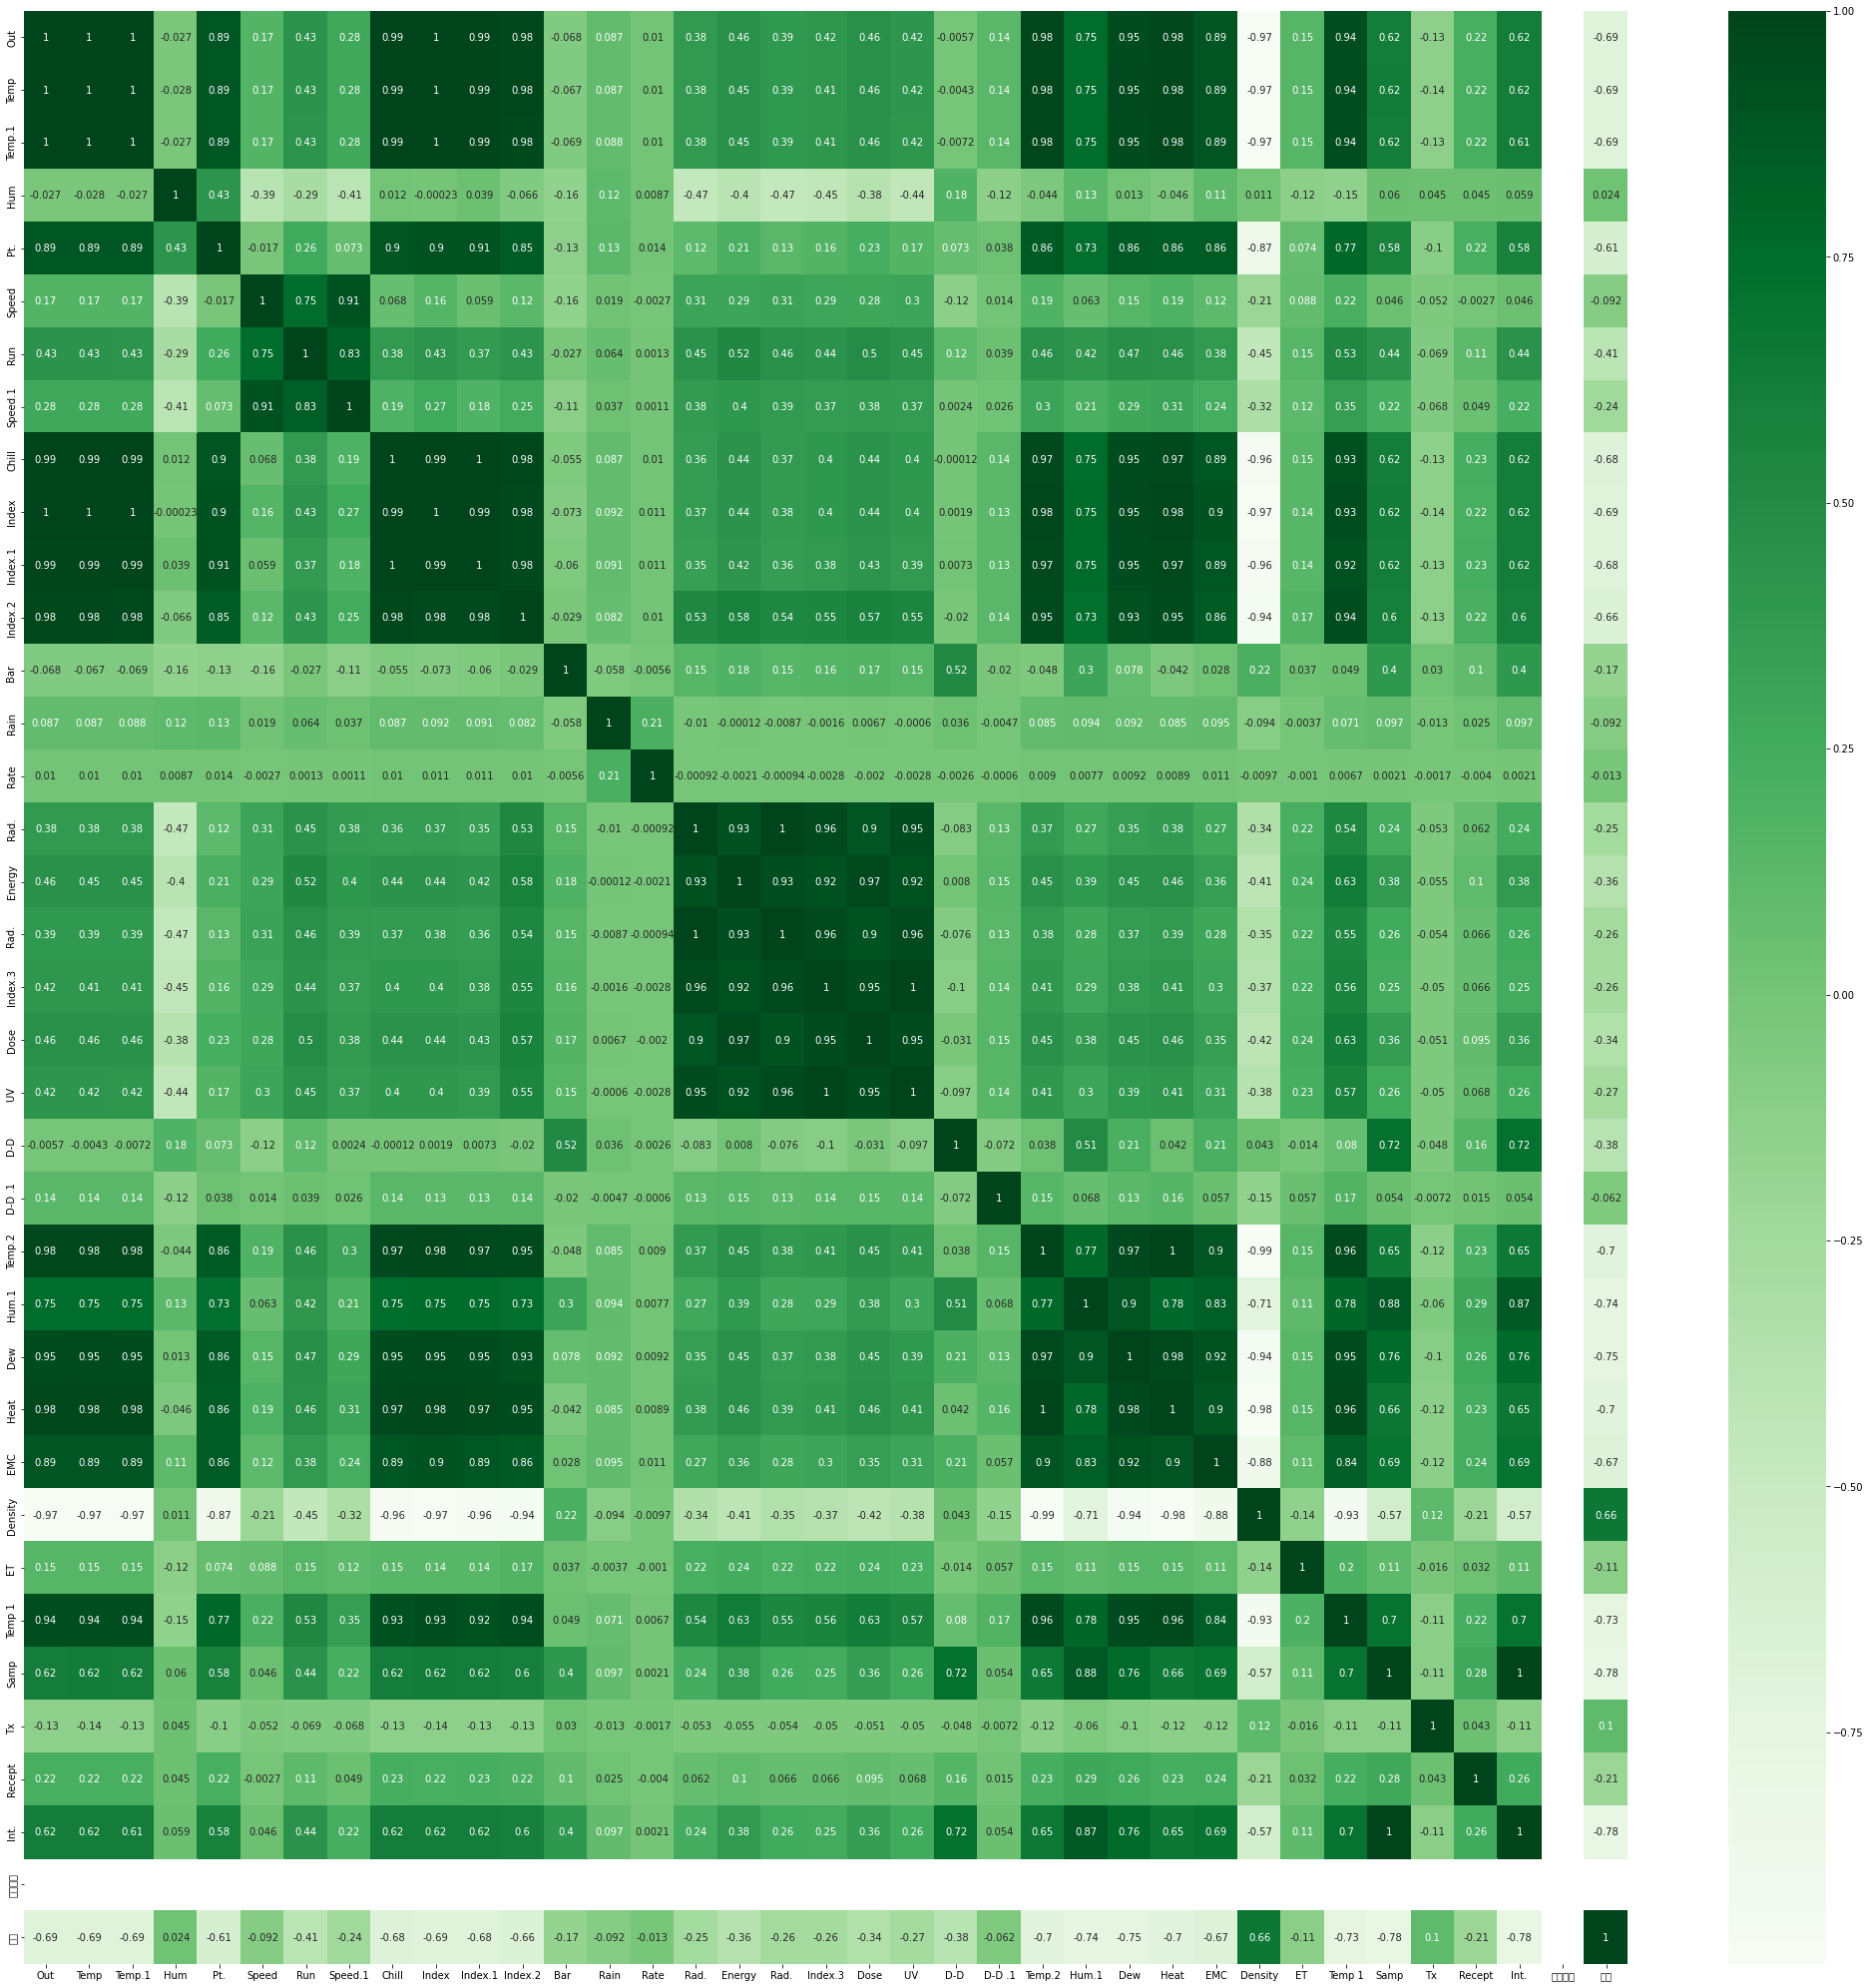

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(36, 36))
ax = sns.heatmap(data = df_xy.astype(float).corr(), annot=True, cmap='Greens')
plt.show()

In [ ]:
# 특정 컬럼과 정답 컬럼 간의 상관계수 오름차순 출력
pd.set_option('display.max_rows', 37)
df_xy.astype(float).corr().iloc[36].sort_values()

Samp      -0.781221
Int.      -0.781119
Dew       -0.752605
Hum.1     -0.743414
Temp 1    -0.733165
Heat      -0.702794
Temp.2    -0.698993
Index     -0.687218
Temp      -0.687046
Out       -0.686115
Temp.1    -0.685326
Index.1   -0.683456
Chill     -0.682918
EMC       -0.669410
Index.2   -0.663909
Pt.       -0.610083
Run       -0.407524
D-D       -0.380841
Energy    -0.359415
Dose      -0.343129
UV        -0.270021
Index.3   -0.264716
Rad.      -0.261362
Rad.      -0.251573
Speed.1   -0.235383
Recept    -0.208319
Bar       -0.167137
ET        -0.114981
Rain      -0.092162
Speed     -0.091990
D-D .1    -0.061725
Rate      -0.013190
Hum        0.023818
Tx         0.104708
Density    0.657527
요약         1.000000
수막두께            NaN
Name: 요약, dtype: float64

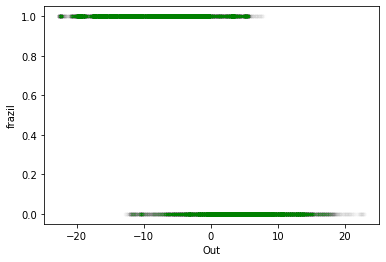

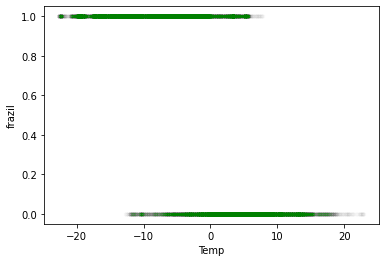

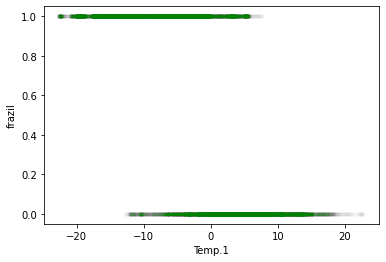

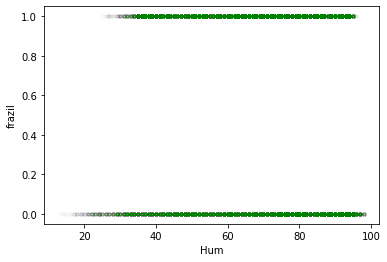

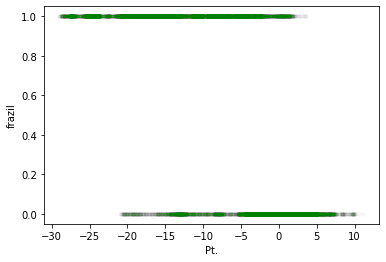

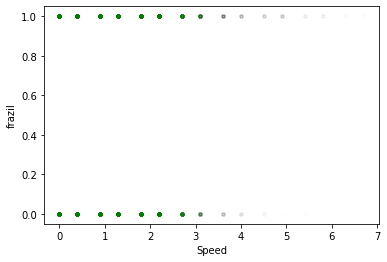

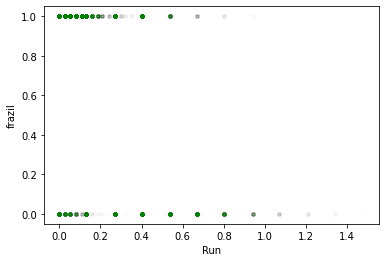

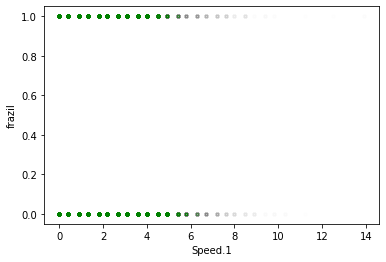

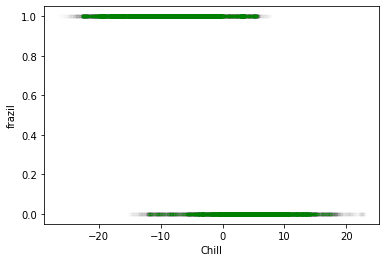

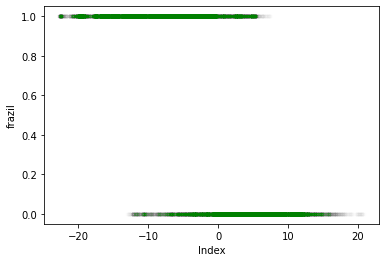

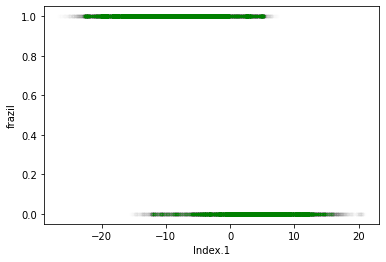

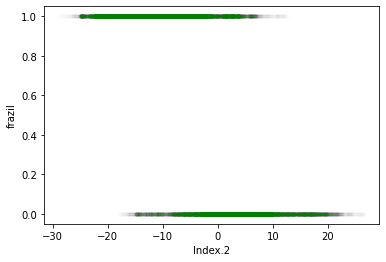

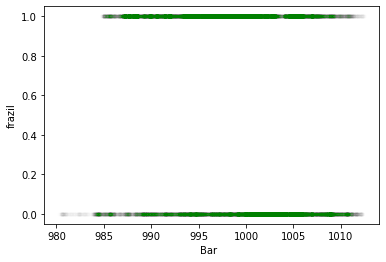

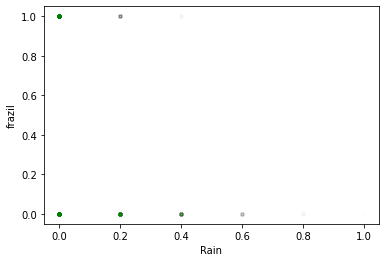

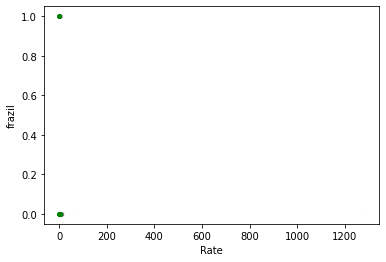

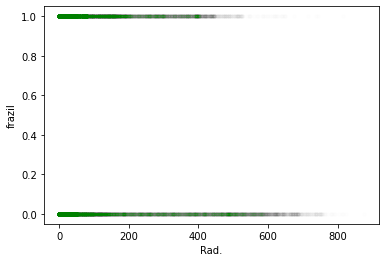

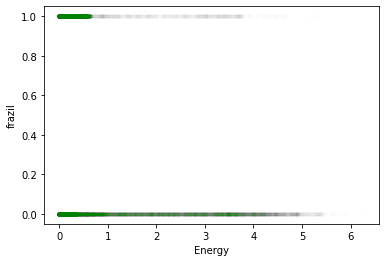

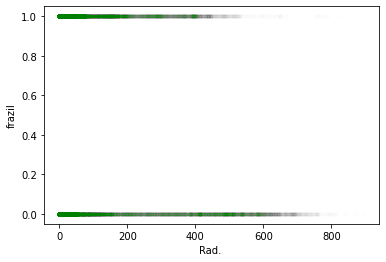

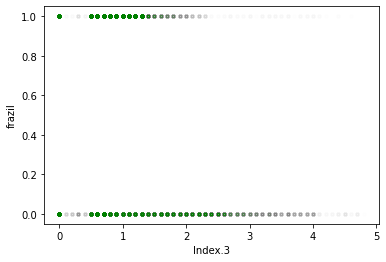

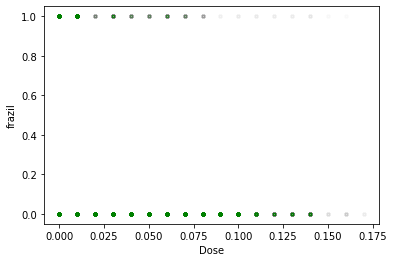

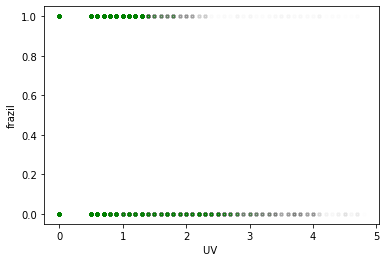

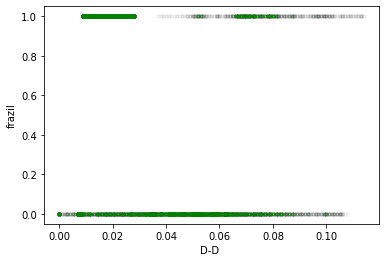

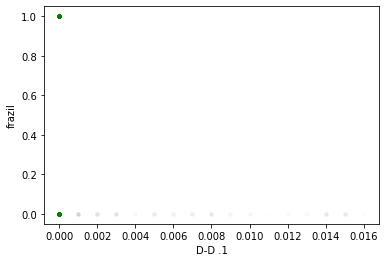

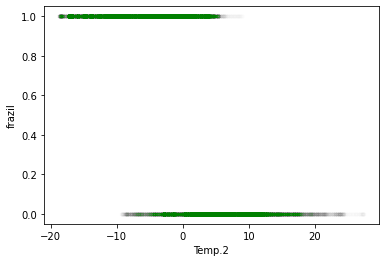

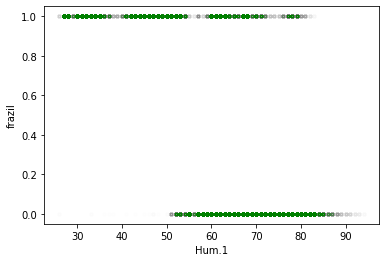

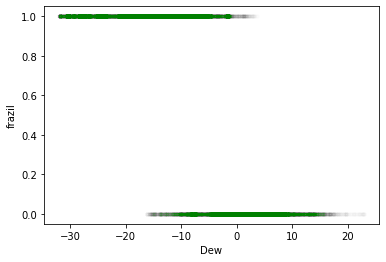

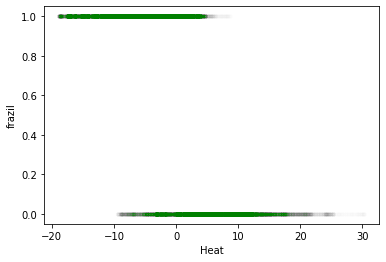

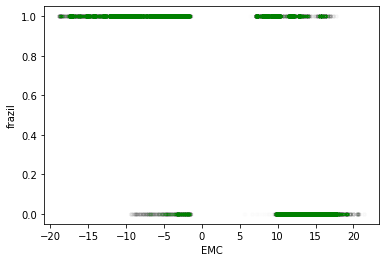

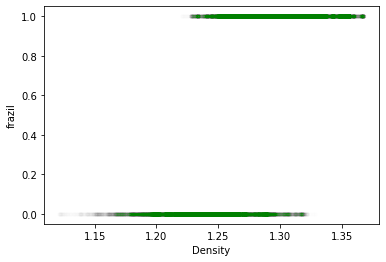

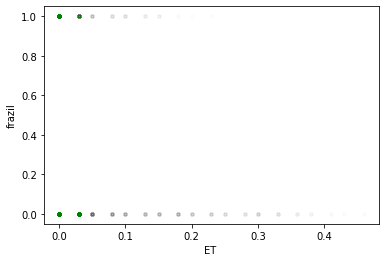

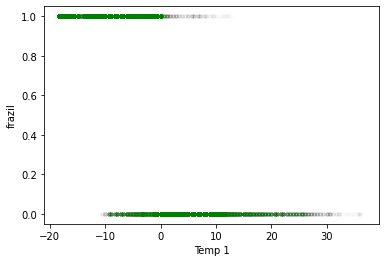

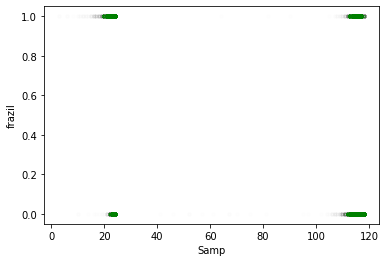

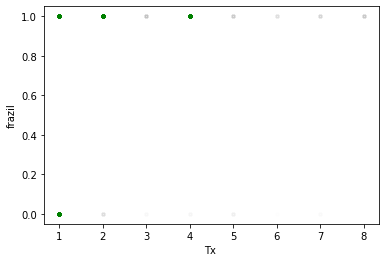

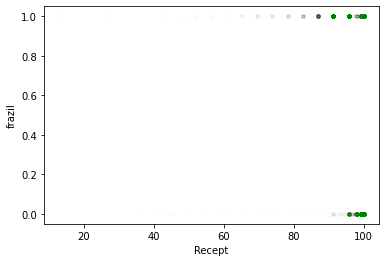

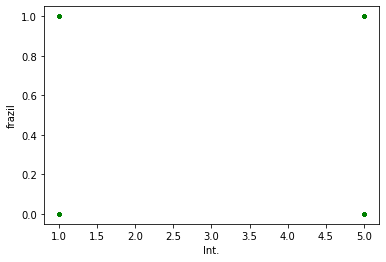

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_te

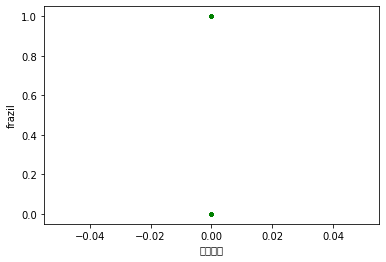

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df_xy.columns)-1):
  plt.scatter(df_xy[df_xy.columns[i]], df_xy['요약'], alpha = 0.004, linewidth=2, s=10, c='green')
  plt.xlabel(df_xy.columns[i])
  plt.ylabel('frazil')
  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_te

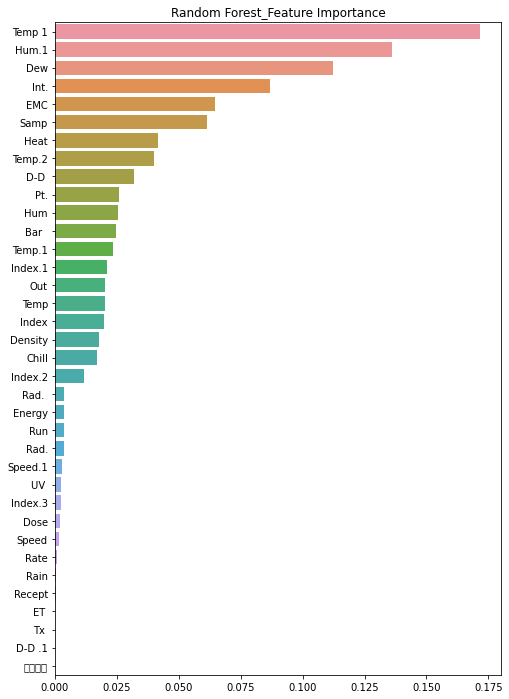

In [ ]:
rf_ft_importance = rf_model.feature_importances_
rf_ft_series = pd.Series(rf_ft_importance, index = features.columns)
rf_sort = rf_ft_series.sort_values(ascending=False)

plt.figure(figsize=(8,12))
plt.title('Random Forest_Feature Importance')
sns.barplot(x=rf_sort, y=rf_sort.index)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_te

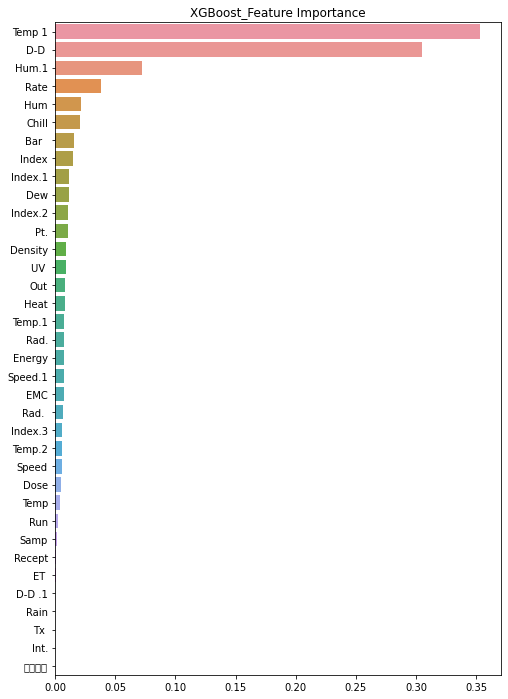

In [ ]:
xgb_ft_importance = xgb_model.feature_importances_
xgb_ft_series = pd.Series(xgb_ft_importance, index = features.columns)
xgb_sort = xgb_ft_series.sort_values(ascending=False)

plt.figure(figsize=(8,12))
plt.title('XGBoost_Feature Importance')
sns.barplot(x=xgb_sort, y=xgb_sort.index)
plt.show()

# LSTM

### 데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed',
       'Run', 'Speed.1', 'Chill', 'Index', 'Index.1',
       'Index.2', 'Bar  ', 'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ',
       'Index.3', 'Dose', 'UV ', 'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew',
       'Heat', 'EMC', 'Density', 'ET ', 'Temp 1', 'Samp', 'Tx ',
       'Recept', 'Int.', '수막두께', '요약']
df_scaled = scaler.fit_transform(df_xy[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,Out,Temp,Temp.1,Hum,Pt.,Speed,Run,Speed.1,Chill,Index,...,EMC,Density,ET,Temp 1,Samp,Tx,Recept,Int.,수막두께,요약
0,0.356828,0.358242,0.356828,0.505882,0.380597,0.059701,0.02027,0.064748,0.406504,0.367816,...,0.338730,0.658012,0.0,0.170909,0.173913,0.0,1.000000,0.0,0.0,1.0
1,0.356828,0.358242,0.356828,0.517647,0.385572,0.059701,0.02027,0.064748,0.406504,0.367816,...,0.338730,0.657201,0.0,0.170909,0.165217,0.0,0.950575,0.0,0.0,1.0
2,0.356828,0.356044,0.356828,0.541176,0.395522,0.059701,0.02027,0.093525,0.406504,0.367816,...,0.338730,0.656389,0.0,0.170909,0.182609,0.0,1.000000,0.0,0.0,1.0
3,0.356828,0.356044,0.356828,0.576471,0.410448,0.059701,0.02027,0.064748,0.406504,0.370115,...,0.338730,0.656389,0.0,0.170909,0.147826,0.0,0.850575,0.0,0.0,1.0
4,0.356828,0.356044,0.356828,0.600000,0.420398,0.059701,0.02027,0.064748,0.406504,0.367816,...,0.338730,0.655578,0.0,0.170909,0.173913,0.0,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39002,0.658590,0.657143,0.658590,0.658824,0.771144,0.000000,0.00000,0.000000,0.684959,0.682759,...,0.977584,0.388235,0.0,0.503636,0.956522,0.0,0.989655,1.0,0.0,0.0
39003,0.658590,0.657143,0.656388,0.647059,0.766169,0.000000,0.00000,0.000000,0.684959,0.680460,...,0.977584,0.390669,0.0,0.503636,0.939130,0.0,0.970115,1.0,0.0,0.0
39004,0.656388,0.654945,0.656388,0.705882,0.786070,0.000000,0.00000,0.000000,0.682927,0.680460,...,0.977584,0.391481,0.0,0.503636,0.930435,0.0,0.959770,1.0,0.0,0.0
39005,0.654185,0.654945,0.654185,0.682353,0.776119,0.000000,0.00000,0.000000,0.680894,0.678161,...,0.977584,0.393509,0.0,0.494545,0.947826,0.0,0.979310,1.0,0.0,0.0


In [ ]:
TEST_SIZE = 10000 # 얼마나 과거의 데이터까지 이용하여 Train 데이터로 할 것인가. (테스트 데이터의 수)
WINDOW_SIZE = 15 # 과거 몇 개 데이터를 이용하여 예측할 것인가

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed',
       'Run', 'Speed.1', 'Chill', 'Index', 'Index.1',
       'Index.2', 'Bar  ', 'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ',
       'Index.3', 'Dose', 'UV ', 'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew',
       'Heat', 'EMC', 'Density', 'ET ', 'Temp 1', 'Samp', 'Tx ',
       'Recept', 'Int.', '수막두께']
label_cols = ['요약']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, WINDOW_SIZE)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((23193, 15, 36), (5799, 15, 36))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((10000, 36), (10000, 1))

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, WINDOW_SIZE)
test_feature.shape, test_label.shape

((9985, 15, 36), (9985, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(128,
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model.add(LSTM(64,  activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,  activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, 
                                    epochs=20,
                                    batch_size=64,
                                    validation_data=(x_valid, y_valid)
                                   )

Epoch 1/20
363/363 [==============================] - 34s 85ms/step - loss: 0.2204 - accuracy: 0.8857 - val_loss: 0.1660 - val_accuracy: 0.9021
Epoch 2/20
363/363 [==============================] - 50s 137ms/step - loss: 0.1611 - accuracy: 0.9171 - val_loss: 0.1432 - val_accuracy: 0.9167
Epoch 3/20
363/363 [==============================] - 36s 99ms/step - loss: 0.1373 - accuracy: 0.9352 - val_loss: 0.1186 - val_accuracy: 0.9464
Epoch 4/20
363/363 [==============================] - 37s 102ms/step - loss: 0.1260 - accuracy: 0.9405 - val_loss: 0.1172 - val_accuracy: 0.9486
Epoch 5/20
363/363 [==============================] - 59s 162ms/step - loss: 0.1269 - accuracy: 0.9405 - val_loss: 0.0974 - val_accuracy: 0.9590
Epoch 6/20
363/363 [==============================] - 51s 140ms/step - loss: 0.1040 - accuracy: 0.9532 - val_loss: 0.0760 - val_accuracy: 0.9664
Epoch 7/20
363/363 [==============================] - 51s 141ms/step - loss: 0.1039 - accuracy: 0.9536 - val_loss: 0.0779 - val_accu

In [ ]:
score = model.evaluate(test_feature, test_label)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.2184 - accuracy: 0.9285
test_loss:  0.2183593213558197
test_acc:  0.9284927248954773


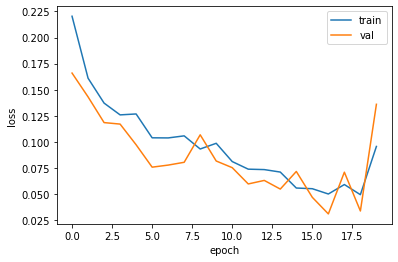

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [ ]:
model.save('LSTM_model.h5')

# CNN

## 이미지 데이터 전처리

### Train Dataset과 Valdation Dataset 나누기

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

bs = 16 # batch size
image_size = 256 # 이미지를 (image_size, image_size) 으로 변환하기 위한 변수
num_classes = 2 # 클래스 수: 결빙, 비결빙 두 가지

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/deeplearning_bootcamp/data",
    validation_split=0.2,
    subset="training",
    seed=1337, # 임의로 정한 값
    color_mode='rgb',
    image_size=(image_size, image_size),
    batch_size=bs,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/deeplearning_bootcamp/data",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    color_mode='rgb',
    image_size=(image_size, image_size),
    batch_size=bs,
)

Found 1421 files belonging to 2 classes.
Using 1137 files for training.
Found 1421 files belonging to 2 classes.
Using 284 files for validation.


### 라벨링된 데이터 확인 (0: 결빙, 1: 비결빙)

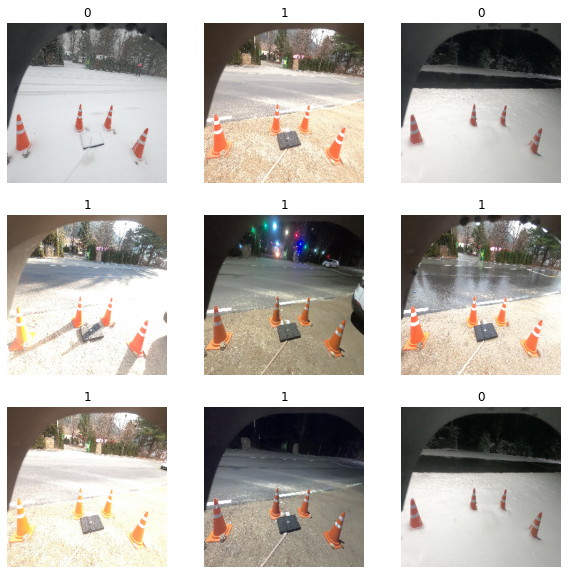

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# train 데이터셋 중 9개 데이터의 이미지, 라벨를 뽑아서 시각화
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
images.shape # (batch size, image_size, image_size, rgb)

TensorShape([16, 256, 256, 3])

#### 이미지 증강

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)

##### 소프트웨어 파이프라이닝
데이터가 소비되는 시간과 데이터가 생성되는 시간 간의 의존성을 줄이기 위해, 요청된 시간 전에 입력 데이터셋에서 데이터를 가져온다. </br>
tf.data.experimental.AUTOTUNE를 사용하면 tf.data 런타임 실행 시에 동적으로 값을 조정한다.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

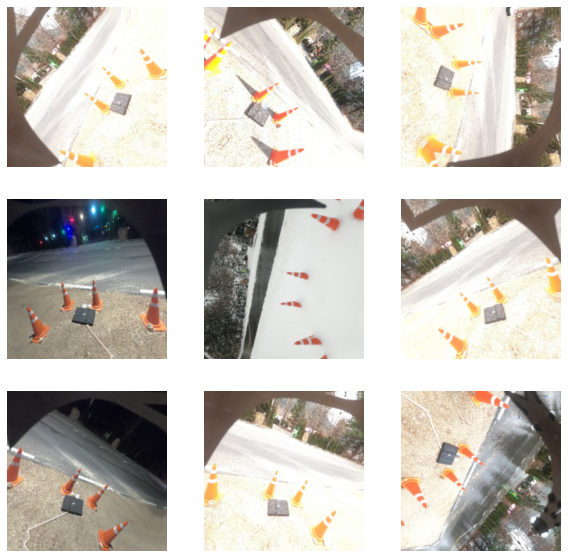

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

## Feature Extractor(이미지 데이터 추출 모델) - ResNet101사용

In [ ]:
# resnet 모델 생성 - 
base_model = tf.keras.applications.ResNet101(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))

171458560/171446536 [==============================] - 3s 0us/step


In [ ]:
# 이미지 데이터, 레이블을 list 형태로 순차적 저장
import numpy as np

img_list = list()
label_list = list()

for images, labels in train_ds:
  for image, label in zip(images, labels):
    img_list.append(image.numpy())
    label_list.append(int(label))

###### SVM 분류 모델 학습에 쓸 feature를 추출하기 위한 모델 생성

In [ ]:
model = tf.keras.models.Sequential()

model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 42,658,176
Trainable params: 42,552,832
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
np.array(img_list).shape

(1137, 256, 256, 3)

In [ ]:
# list를 numpy array로 변환
img_list= np.array(img_list)
label_list = np.array(label_list)

In [ ]:
resnet_feature = model.predict(img_list)

In [ ]:
# 평균 0 , 분산 1로 조정
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(resnet_feature)
scaled_feature = scalar.transform(resnet_feature)

In [ ]:
scaled_feature.shape

(1137, 2048)

## Classifier(분류 모델)
역할: 이미지에서 추출된 feature를 분류 </br></br>
- Fully Connected Layers </br>
- Global Average Pooling + Fully Connected Layers </br>
- Global Average Pooling +  Support Vector Machine </br></br>
참고 자료, 논문:</br>https://dsbook.tistory.com/59 (FC) </br>https://gaussian37.github.io/dl-concept-global_average_pooling/ (GAP), </br>
https://www.researchgate.net/publication/341906662_Deep_Learning_based_Feature_Extraction_for_Texture_Classification (SVM)


### 1. GAP + SVM</br>

##### GridSearch를 이용한 최적의 parameter 찾은 후 모델 생성 및 학습

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(scaled_feature, label_list)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
svmclf = clf.best_estimator_
svmclf.fit(scaled_feature, label_list)

SVC(C=10, gamma=0.0001)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, scaled_feature, label_list, cv=5)
scores

array([1.        , 1.        , 0.99118943, 0.99559471, 1.        ])

##### validation dataset에 대한 교차 검증별 정확도 확인

In [ ]:
val_img_list = list()
val_label_list = list()

for images, labels in val_ds:
  for image, label in zip(images, labels):
    val_img_list.append(image.numpy())
    val_label_list.append(int(label))

In [ ]:
val_img_list = np.array(val_img_list)
val_label_list = np.array(val_label_list)

val_resnet_feature = model.predict(val_img_list)
val_scaled_feature = scalar.transform(val_resnet_feature)

scores = cross_val_score(clf, val_scaled_feature, val_label_list, cv=5)

In [ ]:
scores

array([1.        , 1.        , 1.        , 1.        , 0.98214286])

In [ ]:
joblib.dump(svmclf, '/content/drive/MyDrive/deeplearning_bootcamp/models/CNN_GAP_SVM_model.pkl') 

['/content/drive/MyDrive/deeplearning_bootcamp/models/CNN_GAP_SVM_model.pkl']

###### svm 분류 모델을 이용한 CNN모델의 학습 후 예측 결과 시각화(0: 결빙, 1: 비결빙)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as

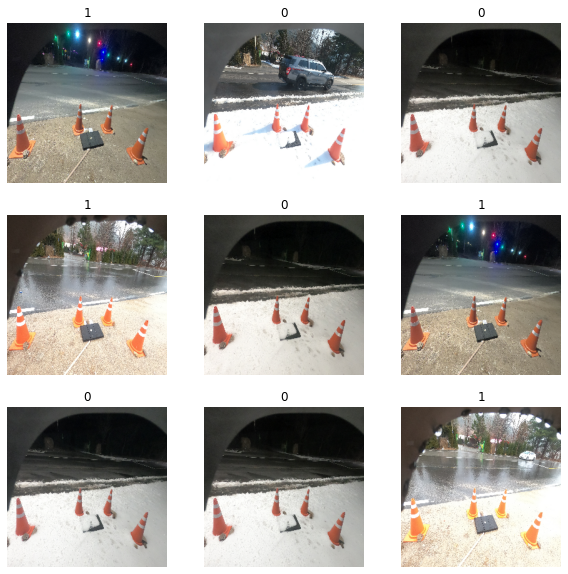

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        feature = model.predict(img.reshape(1, 256, 256, 3))
        scaled_feature = scalar.transform(feature)
        plt.title(int(clf.predict(scaled_feature)))
        plt.axis("off")

### 2. FC

In [ ]:
base_model.trainalbe = False

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
epochs = 20

In [ ]:
model1 = tf.keras.models.Sequential()

# model1.add(tf.keras.layers.Rescaling(1./255))

model1.add(base_model)

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(None, image_size*image_size*3)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model1.build((None, image_size, image_size, 3))
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 1)               

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model1.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
72/72 [==============================] - 93s 1s/step - loss: 24.5836 - accuracy: 0.9446 - val_loss: 3.1880 - val_accuracy: 0.9930
Epoch 2/20
72/72 [==============================] - 88s 1s/step - loss: 36.1673 - accuracy: 0.9701 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
72/72 [==============================] - 87s 1s/step - loss: 31.8012 - accuracy: 0.9648 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
72/72 [==============================] - 87s 1s/step - loss: 70.8629 - accuracy: 0.9587 - val_loss: 123.0677 - val_accuracy: 0.9789
Epoch 5/20
72/72 [==============================] - 87s 1s/step - loss: 94.7408 - accuracy: 0.9657 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
72/72 [==============================] - 87s 1s/step - loss: 107.8961 - accuracy: 0.9824 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
72/72 [==============================] - 88s 1s/step - loss: 65.2215 - accuracy: 0.9710 - val_loss: 0.0000e+00 - val_accurac

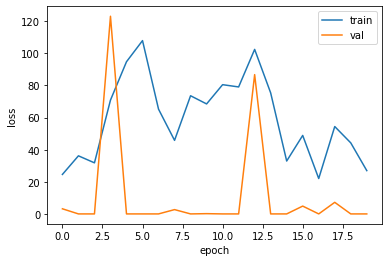

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [ ]:
model1.save('/content/drive/MyDrive/deeplearning_bootcamp/models/CNN_FC_model.h5')

### 3. GAP+FC

In [ ]:
epochs = 20

In [ ]:
model2 = tf.keras.models.Sequential()

# model2.add(tf.keras.layers.Rescaling(1./255))

model2.add(base_model)

model2.add(tf.keras.layers.GlobalAveragePooling2D())
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.build((None, image_size, image_size, 3))
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 43,707,777
Trainable params: 1,049,601
Non-trainable params: 42,658,176
_________________________________

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
72/72 [==============================] - 104s 1s/step - loss: 2.1511 - accuracy: 0.8848 - val_loss: 0.0341 - val_accuracy: 0.9894
Epoch 2/20
72/72 [==============================] - 89s 1s/step - loss: 0.0891 - accuracy: 0.9798 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 3/20
72/72 [==============================] - 88s 1s/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0139 - val_accuracy: 0.9894
Epoch 4/20
72/72 [==============================] - 88s 1s/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0851 - val_accuracy: 0.9718
Epoch 5/20
72/72 [==============================] - 89s 1s/step - loss: 0.0613 - accuracy: 0.9842 - val_loss: 0.0126 - val_accuracy: 0.9930
Epoch 6/20
72/72 [==============================] - 89s 1s/step - loss: 0.0303 - accuracy: 0.9930 - val_loss: 0.0226 - val_accuracy: 0.9894
Epoch 7/20
72/72 [==============================] - 89s 1s/step - loss: 0.0388 - accuracy: 0.9868 - val_loss: 0.0038 - val_accuracy: 0.9965
Epoch 8/20
72/72 [=

In [ ]:
model2.save('/content/drive/MyDrive/deeplearning_bootcamp/models/CNN_GAP_FC_model.h5')

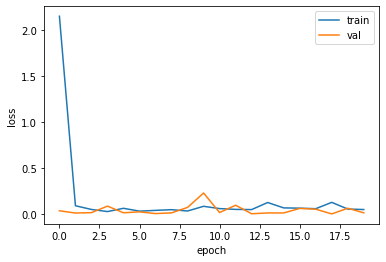

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])